# Projeto 3 - Fazendo um modelo de investimento com Python - Factor Investing no Ibovespa.
Desafio:
Construir um código que faça um backtesting dos últimos 6 anos, escolhendo as 10 melhores ações do índice ibovespa e utilizando como critério o fator momento 6 meses.

###Passo a passo da estratégia:

Passo 1 - Definir um universo investível.

Passo 2 - Escolher o fator que servirá como critério para criação dos rankings.

Passo 3 - Escolher o período de teste.

Passo 4 - Escolher o número de ações na carteira.

Passo 5 - Definir o período de balanceamento. De quanto em quanto tempo a carteira muda?

###Passo a passo do código?

Passo 1 - Ler a composição histórica do Ibovespa e os tickers que já passaram pelo índice.

Passo 2 - Puxar as cotações de todas as empresas que farão parte do backtest.

Passo 3 - Transformar o índice em data e ordenar a série de tempo.

Passo 4 - Calcular o retorno 6 meses e ajustar a tabela com o fator.

Passo 5 - Classificar e retirar empresas que não participaram do Ibovespa no período de tempo selecionado.

Passo 6 - Criar as carteiras de investimento em uma matriz de 0 ou 1.

Passo 7 - Calcular o retorno mensal das empresas no período de backtest.

Passo 8 - Cruzar a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo.

Passo 9 - Puxar e calcular a rentabilidade do Ibovespa no período.

Passo 10 - Calcular e visualizar as rentabilidades do modelo contra o Ibovespa.


Universo: Ibovespa
Fator: MTUM 6 meses
Período de teste: Desde 2016
Nº de ações: 10 ações
Rebalanceamento: Todo mês

In [1]:
import pandas as pd 
import yfinance as yf 
import quantstats as qs 

# Passo 1 - Ler a composição histórica do Ibovespa e os tickers que já passaram pelo índice.

In [2]:
composicao_historica = pd.read_excel(r'/Users/joaopedrodiniz/Downloads/composicao_ibov .xlsx')
lista_acoes = pd.read_excel(r'/Users/joaopedrodiniz/Downloads/composicao_ibov .xlsx', sheet_name = 'lista_acoes')

composicao_historica

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,ITUB4,PETR4,ITUB4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,PETR4,ITUB4,PETR4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3,BBDC4,BBDC4,BBDC4
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4,PETR3,PETR3,PETR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,GOLL4,CVCB3,CVCB3,EZTC3
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,CASH3,GOLL4,ECOR3,ECOR3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,CASH3,CASH3,EZTC3,CASH3,POSI3,POSI3,ECOR3,GOLL4,CVCB3
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POSI3,POSI3,POSI3,CASH3,POSI3,NaN,NaN,POSI3,POSI3,CASH3


In [3]:
lista_acoes

,tickers
0,ENEV3.SA
1,SOMA3.SA
2,ELET6.SA
3,BIDI4.SA
4,RAIZ4.SA
...,...
102,VVAR11.SA
103,ABEV3.SA
104,BRPR3.SA
105,HYPE3.SA


# Passo 2 - Puxar as cotações de todas as empresas que farão parte do backtest.

In [4]:
dados_cotacoes = (yf.download(lista_acoes['tickers'].to_list(),
                             start = "2015-06-30", end = "2022-12-31")['Adj Close'])

dados_cotacoes

[*********************100%***********************]  107 of 107 completed

5 Failed downloads:
- HGTX3.SA: No data found, symbol may be delisted
- BIDI11.SA: No data found, symbol may be delisted
- LCAM3.SA: No data found, symbol may be delisted
- BIDI4.SA: No data found, symbol may be delisted
- JPSA3.SA: No data found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-06,14.955097,34.472347,70.092140,58.337585,NaN,NaN,59.070000,14.272635,41.295864,20.736032,...,23.344828,8.714756,39.666424,NaN,24.375126,14.85,41.580784,NaN,20.639441,51.450108
2020-02-07,14.999420,34.097107,66.621841,58.031548,NaN,NaN,56.290001,14.158316,41.337524,20.670851,...,22.646996,8.350195,38.787926,NaN,23.992449,14.32,41.043026,NaN,19.801142,50.625523
2020-02-10,14.830988,32.586292,64.474960,55.927574,NaN,NaN,56.820000,14.255047,40.929161,20.781670,...,22.274818,8.063754,37.365944,NaN,23.917572,13.79,41.106289,NaN,20.008307,50.002296
2020-02-11,14.893043,33.840370,69.209854,57.084755,NaN,NaN,58.340000,14.334193,42.771008,21.348797,...,23.354132,8.610597,38.750698,NaN,25.040663,14.62,41.833847,NaN,20.740608,50.817284
2020-02-12,14.760069,34.709343,69.533363,59.102665,NaN,NaN,59.660000,14.621464,43.021030,21.042419,...,23.335526,8.558516,39.510078,NaN,25.581402,14.99,41.912918,NaN,21.468102,51.900753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.828236,NaN,NaN
2017-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.744440,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.744440,NaN,NaN


# Passo 3 - Transformar o índice em data e ordenar a série de tempo.


In [5]:
dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)

dados_cotacoes

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-06,14.955097,34.472347,70.092140,58.337585,NaN,NaN,59.070000,14.272635,41.295864,20.736032,...,23.344828,8.714756,39.666424,NaN,24.375126,14.85,41.580784,NaN,20.639441,51.450108
2020-02-07,14.999420,34.097107,66.621841,58.031548,NaN,NaN,56.290001,14.158316,41.337524,20.670851,...,22.646996,8.350195,38.787926,NaN,23.992449,14.32,41.043026,NaN,19.801142,50.625523
2020-02-10,14.830988,32.586292,64.474960,55.927574,NaN,NaN,56.820000,14.255047,40.929161,20.781670,...,22.274818,8.063754,37.365944,NaN,23.917572,13.79,41.106289,NaN,20.008307,50.002296
2020-02-11,14.893043,33.840370,69.209854,57.084755,NaN,NaN,58.340000,14.334193,42.771008,21.348797,...,23.354132,8.610597,38.750698,NaN,25.040663,14.62,41.833847,NaN,20.740608,50.817284
2020-02-12,14.760069,34.709343,69.533363,59.102665,NaN,NaN,59.660000,14.621464,43.021030,21.042419,...,23.335526,8.558516,39.510078,NaN,25.581402,14.99,41.912918,NaN,21.468102,51.900753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.828236,NaN,NaN
2017-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.744440,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.744440,NaN,NaN


In [6]:
dados_cotacoes = dados_cotacoes.sort_index()

dados_cotacoes

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668836,5.577975,19.304613,19.890106,NaN,NaN,NaN,2.914592,16.064674,9.204790,...,29.088478,3.501015,11.896464,14.912728,NaN,6.839885,21.685192,11.133475,6.445275,13.737410
2015-07-01,14.776978,5.665764,18.623274,19.898388,NaN,NaN,NaN,2.894613,15.859569,9.145574,...,28.809891,3.475523,11.779387,14.759581,NaN,6.839885,21.480062,11.222941,6.604626,13.546080
2015-07-02,14.707459,5.631999,18.831461,20.088928,NaN,NaN,NaN,2.884623,15.813250,9.151252,...,29.154812,3.492518,11.753370,14.797868,NaN,6.839885,22.007547,11.073832,6.635141,13.622613
2015-07-03,14.792424,5.638751,18.594885,19.964663,NaN,NaN,NaN,2.857149,15.661077,9.177588,...,28.951397,3.424537,11.499701,NaN,NaN,7.655104,22.007547,NaN,6.723293,13.530775
2015-07-06,14.846495,5.604987,19.683134,19.964663,NaN,NaN,NaN,2.882125,15.780170,8.999827,...,29.185768,3.552001,11.480186,14.328854,NaN,7.655104,21.984095,10.934664,6.716510,13.431281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.981815,15.05,11.45,13.285341,35.279999,12.797478,...,12.840000,6.920000,86.320000,NaN,15.75,2.560000,37.426117,NaN,38.500000,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.891987,14.78,11.36,13.355002,35.230000,12.500532,...,12.350000,6.960000,87.110001,NaN,15.24,2.550000,36.550312,NaN,38.189999,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.263187,14.72,10.74,12.887279,34.060001,12.577163,...,12.280000,7.020000,89.190002,NaN,15.05,2.370000,36.404343,NaN,38.009998,9.900000


# Passo 4 - Calcular o retorno 6 meses e ajustar a tabela com o fator.

In [7]:
retorno_6_meses = (dados_cotacoes.resample("M").last().pct_change(periods = 6).dropna
                   (axis = 0, how = "all").drop("2022-12-31"))

retorno_6_meses

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044827,-0.076286,-0.253431,-0.113005,NaN,NaN,NaN,-0.019676,-0.362492,-0.235068,...,-0.076003,-0.623786,-0.273276,-0.325780,NaN,-0.781977,-0.067328,-0.708036,-0.204485,-0.222841
2016-01-31,-0.026099,0.001546,-0.266998,-0.100444,NaN,NaN,NaN,0.030454,-0.340404,-0.260394,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,-0.838961,-0.182059,-0.662428,-0.167808,-0.177091
2016-02-29,-0.054421,0.251857,-0.259615,-0.178820,NaN,NaN,NaN,0.116931,-0.208608,-0.034314,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,-0.707792,0.000863,-0.364170,-0.202454,0.023256
2016-03-31,-0.016942,0.232224,-0.044415,0.183737,NaN,NaN,NaN,0.435515,0.347494,0.330233,...,0.052332,-0.459702,-0.067891,-0.124446,NaN,-0.110294,0.258974,0.406566,-0.078546,-0.159574
2016-04-30,0.031436,0.167526,-0.060357,0.164968,NaN,NaN,NaN,0.561555,0.434324,0.376727,...,0.087326,-0.100719,0.154162,0.121882,NaN,0.024346,0.138833,0.442703,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.002672,-0.243810,-0.547151,-0.018412,0.275232,NaN,-0.598425,-0.223076,0.147972,-0.137303,...,-0.123544,-0.431752,-0.104346,0.000000,-0.268994,-0.491525,-0.069730,0.000000,-0.115124,-0.396184
2022-08-31,0.004605,-0.197824,-0.464262,0.153951,0.377360,NaN,-0.347964,-0.167555,0.240284,0.040985,...,-0.046599,-0.425352,-0.236548,0.000000,-0.217495,-0.150396,-0.150280,0.000000,-0.030147,-0.416317
2022-09-30,0.009091,-0.184120,-0.479939,0.106898,0.086093,-0.147533,-0.384615,-0.154352,0.136021,0.000962,...,-0.145272,-0.432637,-0.207386,0.000000,-0.244360,-0.235012,-0.216785,0.000000,-0.070701,-0.304705


# Passo 5 - Classificar e retirar empresas que não participaram do Ibovespa no período de tempo selecionado. 

In [8]:
for data in retorno_6_meses.index:
    for empresa in retorno_6_meses.columns:
        
        if empresa.replace(".SA", "") not in composicao_historica.loc[:, data].to_list(): 
        
            retorno_6_meses.loc[data, empresa] = pd.NA

retorno_6_meses

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044827,NaN,-0.253431,NaN,NaN,NaN,NaN,-0.019676,-0.362492,-0.235068,...,-0.076003,-0.623786,-0.273276,-0.32578,NaN,NaN,-0.067328,NaN,<NA>,-0.222841
2016-01-31,-0.026099,NaN,-0.266998,NaN,NaN,NaN,NaN,0.030454,-0.340404,-0.260394,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,NaN,-0.182059,NaN,-0.167808,-0.177091
2016-02-29,-0.054421,NaN,-0.259615,NaN,NaN,NaN,NaN,0.116931,-0.208608,-0.034314,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,NaN,0.000863,NaN,-0.202454,0.023256
2016-03-31,-0.016942,NaN,-0.044415,NaN,NaN,NaN,NaN,0.435515,0.347494,0.330233,...,0.052332,-0.459702,-0.067891,-0.124446,NaN,NaN,0.258974,NaN,-0.078546,-0.159574
2016-04-30,0.031436,NaN,-0.060357,NaN,NaN,NaN,NaN,0.561555,0.434324,0.376727,...,0.087326,-0.100719,0.154162,0.121882,NaN,NaN,0.138833,NaN,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.002672,-0.24381,-0.547151,<NA>,0.275232,NaN,-0.598425,-0.223076,0.147972,-0.137303,...,-0.123544,-0.431752,-0.104346,NaN,-0.268994,-0.491525,-0.069730,NaN,-0.115124,-0.396184
2022-08-31,0.004605,-0.197824,-0.464262,<NA>,0.37736,NaN,-0.347964,-0.167555,0.240284,0.040985,...,-0.046599,-0.425352,-0.236548,NaN,-0.217495,-0.150396,-0.150280,NaN,-0.030147,-0.416317
2022-09-30,0.009091,-0.18412,-0.479939,0.106898,0.086093,NaN,-0.384615,-0.154352,0.136021,0.000962,...,-0.145272,-0.432637,-0.207386,NaN,-0.24436,-0.235012,-0.216785,NaN,-0.070701,-0.304705


# Passo 6 - Criar as carteiras de investimento em uma matriz de 0 ou 1.

In [9]:
carteiras = retorno_6_meses.rank(axis= 1, ascending = False).applymap(lambda x: 1 if x < 11 else 0)


carteiras

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-31,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-31,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-30,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-08-31,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Passo 7 - Calcular o retorno mensal das empresas no período de backtest.

In [10]:
retorno_mensal = dados_cotacoes.resample("M").last().pct_change(periods = 1)

retorno_mensal = retorno_mensal.drop(retorno_mensal.index[:7], axis = 0)

carteiras.index  = retorno_mensal.index 

retorno_mensal


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.045378,0.023876,-0.129350,-0.095238,NaN,NaN,NaN,-0.057851,-0.060380,-0.043574,...,-0.017700,-0.451613,-0.254029,-0.293659,NaN,-0.173333,-0.083431,-0.107034,0.034113,-0.160573
2016-02-29,-0.048030,0.219479,-0.128959,-0.062631,NaN,NaN,NaN,0.132553,-0.022383,0.188885,...,0.064734,0.058823,0.215021,0.182321,NaN,0.814516,0.095162,0.482877,-0.142027,0.089667
2016-03-31,0.065760,-0.123003,0.229437,0.311061,NaN,NaN,NaN,0.320998,0.475473,0.293587,...,0.111854,1.011111,0.282811,0.329439,NaN,0.075556,0.130946,0.286374,0.069196,-0.071316
2016-04-30,0.031383,0.193548,-0.035211,0.038544,NaN,NaN,NaN,0.119218,0.118361,0.027804,...,0.036348,0.381216,0.299670,0.383128,NaN,0.227522,-0.009379,0.100806,0.080427,0.034552
2016-05-31,-0.014440,0.084495,-0.277372,0.026240,NaN,NaN,NaN,-0.067893,-0.249184,-0.126903,...,-0.057581,-0.332000,-0.277806,-0.285896,NaN,-0.124579,-0.030320,0.016313,-0.052042,-0.085088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.022773,-0.061392,0.167143,0.167404,0.160252,0.083157,0.405797,0.068530,0.164769,0.095988,...,0.066194,-0.068525,-0.027340,0.000000,0.102703,0.341667,-0.077578,0.000000,0.008916,-0.070943
2022-09-30,0.017682,0.030523,0.039168,0.065043,-0.045677,-0.118412,-0.107338,0.108099,-0.069854,0.030794,...,-0.133038,-0.062344,0.116899,0.000000,-0.042928,-0.009317,-0.011481,0.000000,0.137732,0.173842
2022-10-31,0.029601,0.032440,-0.084806,0.061884,0.129345,0.101107,0.095788,0.152490,-0.038941,0.021246,...,0.143223,-0.038564,-0.068157,0.000000,0.057971,-0.018809,0.020252,0.000000,0.253267,0.116263


# Passo 8 - Cruzar a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo.

In [11]:
retorno_modelo = (retorno_mensal * carteiras).sum(axis = 1)/10


retorno_modelo 

Date
2016-01-31   -0.043231
2016-02-29    0.076903
2016-03-31    0.091320
2016-04-30    0.165053
2016-05-31   -0.164842
                ...   
2022-08-31    0.114667
2022-09-30   -0.060277
2022-10-31    0.089395
2022-11-30   -0.138985
2022-12-31   -0.024385
Freq: M, Length: 84, dtype: float64

# Passo 8.2 - Visualizar a rentabilidade do modelo com o quantstats.

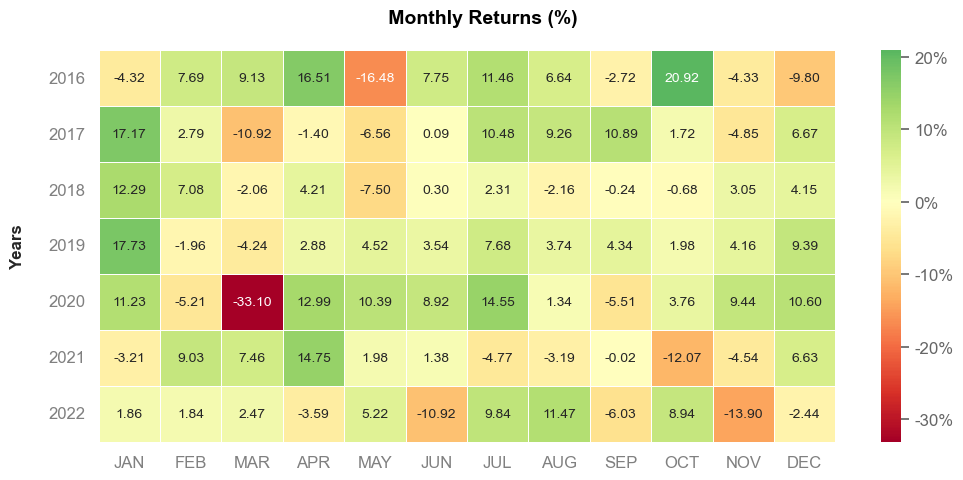

In [12]:
qs.extend_pandas()

retorno_modelo.plot_monthly_heatmap()

# Passo 9 - Puxar e calcular a rentabilidade do Ibovespa no período.

In [13]:
ibovespa = yf.download("^BVSP", start = "2015-12-30", end = "2022-12-31")["Adj Close"]

ibovespa = ibovespa.resample("M").last().pct_change().dropna()

ibovespa 

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-08-31    0.061629
2022-09-30    0.004693
2022-10-31    0.054527
2022-11-30   -0.030602
2022-12-31   -0.021825
Freq: M, Name: Adj Close, Length: 84, dtype: float64

# Passo 10 - Calcular e visualizar as rentabilidades do modelo contra o Ibovespa.

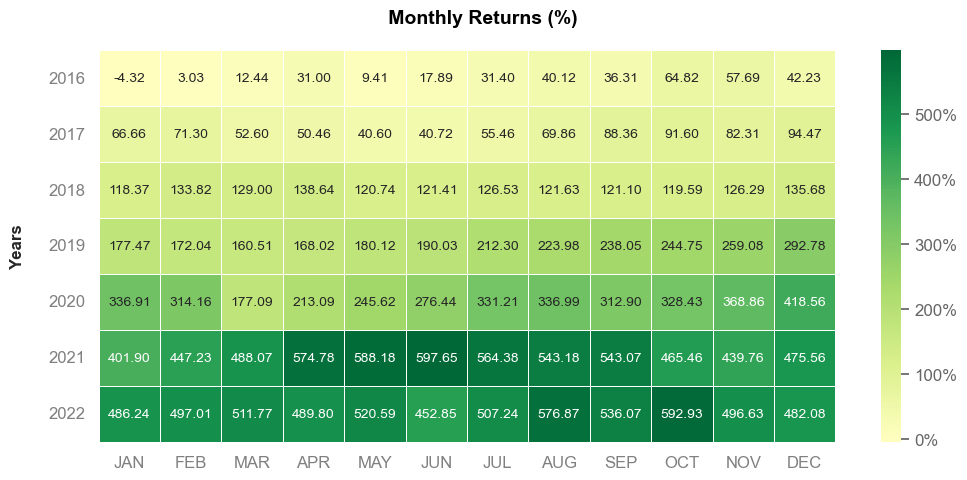

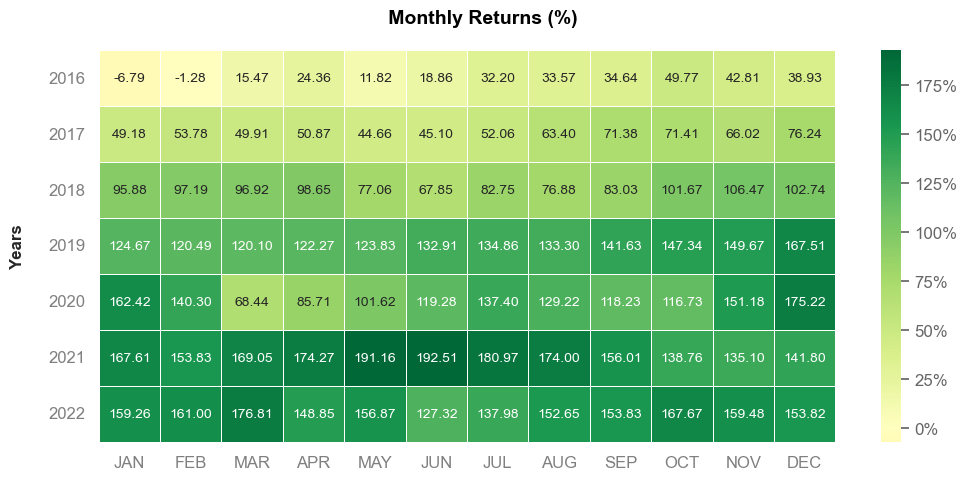

In [14]:
retorno_acumulado_modelo = (1 + retorno_modelo).cumprod() - 1
retorno_acumulado_ibov = (1 + ibovespa).cumprod() - 1

retorno_acumulado_modelo.plot_monthly_heatmap()
retorno_acumulado_ibov.plot_monthly_heatmap()


# Passo 11 - Calcular e visualizar as rentabilidades do modelo mês a mês contra o Ibovespa.

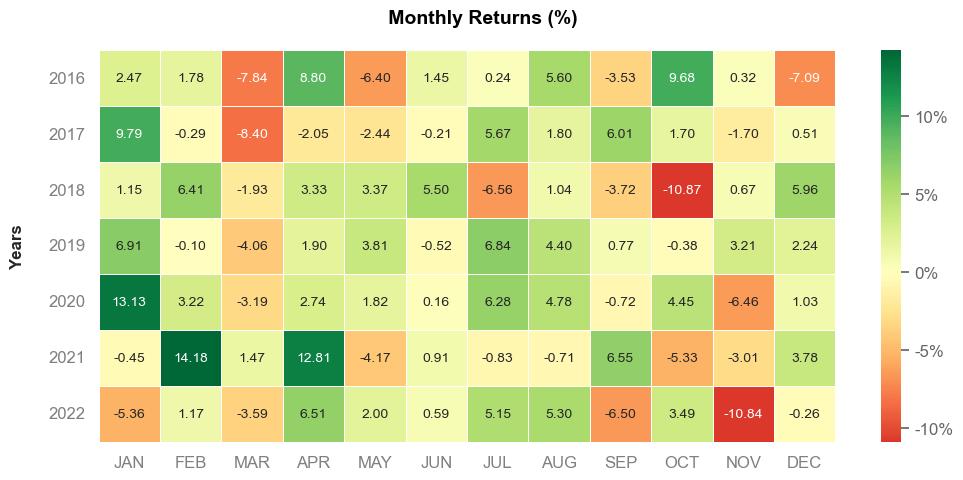

In [15]:
ganhos_modelo = retorno_modelo - ibovespa

ganhos_modelo.plot_monthly_heatmap()